In [80]:
import torch 
import torch.nn as nn
from torchvision.datasets import ImageFolder

In [81]:
# Importing the data
import os
device = "cuda" if torch.cuda.is_available() else "cpu"

# import data
img_path = "Dataset/data"

# show some data
for dirpath , dirname , filename in os.walk(img_path):
    print(f"There are {len(dirname)} dir and {len(filename)} images in '{dirpath}' ")

There are 2 dir and 0 images in 'Dataset/data' 
There are 2 dir and 0 images in 'Dataset/data\Task A' 
There are 2 dir and 0 images in 'Dataset/data\Task A\test' 
There are 0 dir and 114 images in 'Dataset/data\Task A\test\Gray_Leaf_Spot' 
There are 0 dir and 232 images in 'Dataset/data\Task A\test\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task A\train' 
There are 0 dir and 460 images in 'Dataset/data\Task A\train\Gray_Leaf_Spot' 
There are 0 dir and 930 images in 'Dataset/data\Task A\train\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task B' 
There are 2 dir and 0 images in 'Dataset/data\Task B\test' 
There are 0 dir and 229 images in 'Dataset/data\Task B\test\Blight' 
There are 0 dir and 261 images in 'Dataset/data\Task B\test\Common_Rust' 
There are 2 dir and 0 images in 'Dataset/data\Task B\train' 
There are 0 dir and 917 images in 'Dataset/data\Task B\train\Blight' 
There are 0 dir and 1045 images in 'Dataset/data\Task B\train\Common_Rust' 


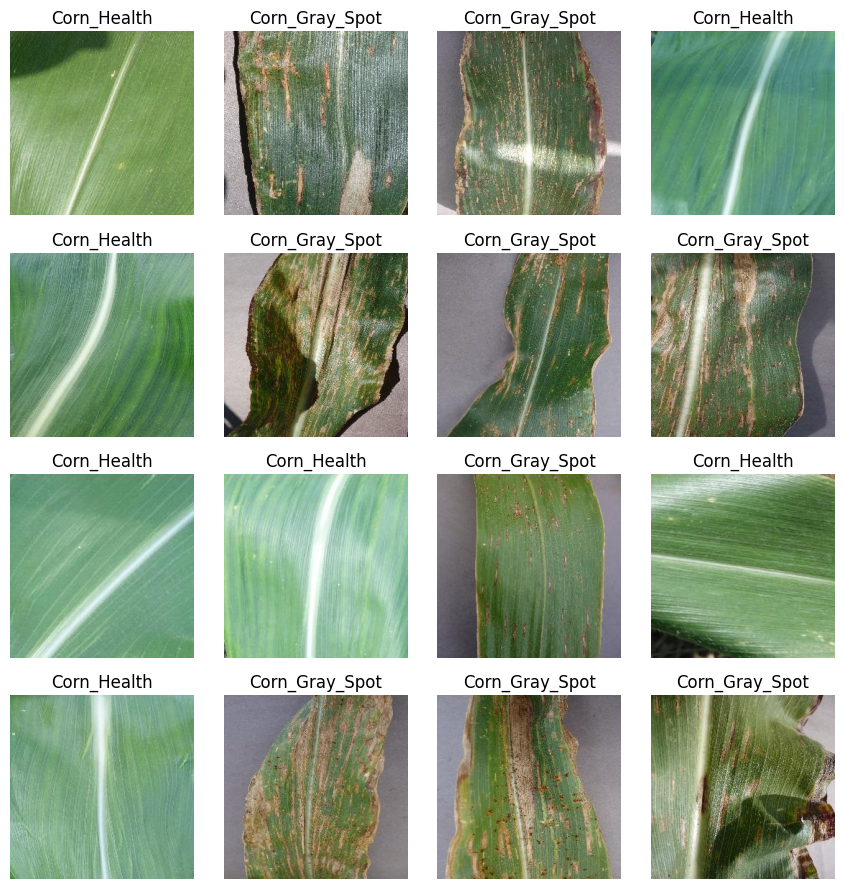

In [82]:
# Visulise some data for task A
import matplotlib.pyplot as plt
import random
import cv2

random.seed(42)

img_path_task_a = "Dataset/data/Task A/train"
fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path_task_a+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3].split(" ")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

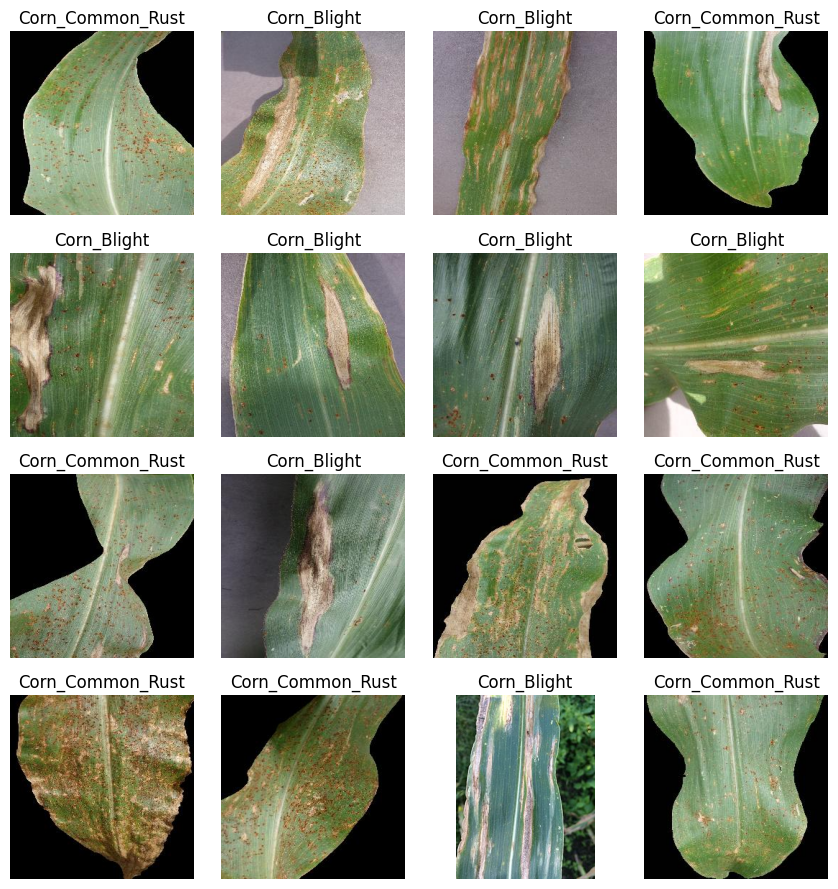

In [158]:
# Visulise some data for task B
import matplotlib.pyplot as plt
import random
import cv2

random.seed(42)

img_path_task_a = "Dataset/data/Task B/train"
fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path_task_a+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3].split(" ")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

In [159]:
for dirpath , dirname , filename in os.walk(img_path):
    print(f"There are {len(dirname)} dir and {len(filename)} images in '{dirpath}' ")

There are 2 dir and 0 images in 'Dataset/data' 
There are 2 dir and 0 images in 'Dataset/data\Task A' 
There are 2 dir and 0 images in 'Dataset/data\Task A\test' 
There are 0 dir and 114 images in 'Dataset/data\Task A\test\Gray_Leaf_Spot' 
There are 0 dir and 232 images in 'Dataset/data\Task A\test\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task A\train' 
There are 0 dir and 460 images in 'Dataset/data\Task A\train\Gray_Leaf_Spot' 
There are 0 dir and 930 images in 'Dataset/data\Task A\train\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task B' 
There are 2 dir and 0 images in 'Dataset/data\Task B\test' 
There are 0 dir and 229 images in 'Dataset/data\Task B\test\Blight' 
There are 0 dir and 261 images in 'Dataset/data\Task B\test\Common_Rust' 
There are 2 dir and 0 images in 'Dataset/data\Task B\train' 
There are 0 dir and 917 images in 'Dataset/data\Task B\train\Blight' 
There are 0 dir and 1045 images in 'Dataset/data\Task B\train\Common_Rust' 


In [160]:
from torch.utils.data import DataLoader , Dataset
from torchvision import datasets , transforms

# setup train and test datafolder 
train_dir_task_a = "Dataset/data/Task A/train"
test_dir_task_a = "Dataset/data/Task A/test"

# making image transforms
data_transform = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor() 
])

<Figure size 1000x1000 with 0 Axes>

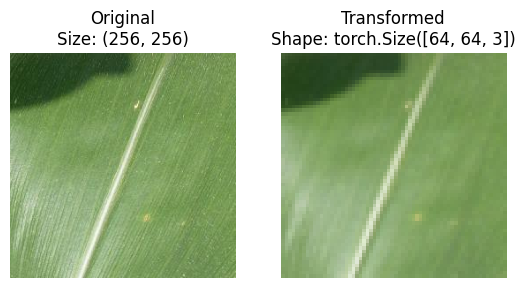

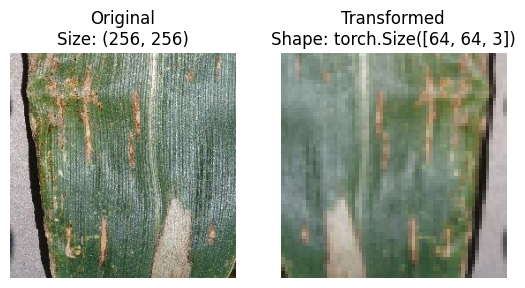

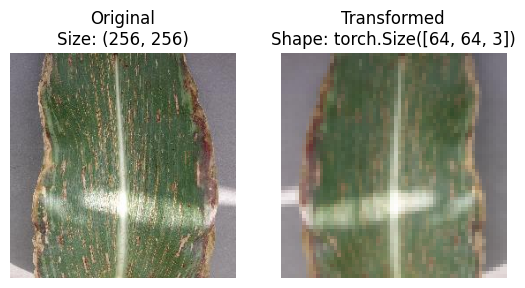

In [161]:
# Visualise the transfromation
from PIL import Image

def transform_and_visualise_img(img_path , transform , n = 3):
    random.seed(42)
    fig = plt.figure(figsize=(10 , 10))
    random_path = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = n)
    for img_ in random_path:
        with Image.open(img_) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
transform_and_visualise_img(img_path= train_dir_task_a , transform= data_transform)
    

In [162]:
# Loding data from folders
from torchvision import datasets
train_data_task_a = datasets.ImageFolder(root= train_dir_task_a,
                                         transform= data_transform,
                                         target_transform= None)

test_data_task_a = datasets.ImageFolder(root=test_dir_task_a ,
                                        transform= data_transform,
                                        target_transform= None)

In [163]:
train_data_task_a , test_data_task_a

(Dataset ImageFolder
     Number of datapoints: 1390
     Root location: Dataset/data/Task A/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 346
     Root location: Dataset/data/Task A/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [164]:
# Traning data Task A

print(f"we have classes {train_data_task_a.classes}")
label_class = train_data_task_a.class_to_idx
label_class = {v:k for k , v in label_class.items()}
print(train_data_task_a.class_to_idx)
print(f"The lengh of the dataset is : {len(train_data_task_a)}")

we have classes ['Gray_Leaf_Spot', 'Healthy']
{'Gray_Leaf_Spot': 0, 'Healthy': 1}
The lengh of the dataset is : 1390


In [165]:
# Hyperparamaters 
lr = 0.01
BATCH_SIZE = 8
epochs = 10

In [166]:
# making dataloders 
train_dataloader_task_a = DataLoader(dataset=train_data_task_a,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_task_a = DataLoader(dataset=test_data_task_a,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader_task_a, train_dataloader_task_a

(<torch.utils.data.dataloader.DataLoader at 0x1f942e70800>,
 <torch.utils.data.dataloader.DataLoader at 0x1f942e70800>)

In [167]:
len(train_dataloader_task_a) , len(train_data_task_a)/8

(174, 173.75)

In [168]:
len(test_dataloader_task_a) , len(test_data_task_a)/8

(44, 43.25)

In [169]:
# Model Building 
class CustomeCNN(nn.Module):
  def __init__(self, ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) 
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) 
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=10*13*13,
                  out_features=2),
        # nn.Sigmoid()
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [170]:
# Finding Model information
from torchinfo import summary
model = CustomeCNN()
summary(model , input_size=(8, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
CustomeCNN                               [8, 2]                    --
├─Sequential: 1-1                        [8, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [8, 10, 62, 62]           280
│    └─ReLU: 2-2                         [8, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [8, 10, 60, 60]           910
│    └─ReLU: 2-4                         [8, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [8, 10, 30, 30]           --
├─Sequential: 1-2                        [8, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [8, 10, 28, 28]           910
│    └─ReLU: 2-7                         [8, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [8, 10, 26, 26]           910
│    └─ReLU: 2-9                         [8, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [8, 10, 13, 13]           --
├─Sequentia

In [171]:
import torch.optim.optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr = lr ,weight_decay= 1e-7 )

In [172]:
torch.nn.BCELoss

torch.nn.modules.loss.BCELoss

In [173]:
for d , l in train_dataloader_task_a:
    print(d.shape) # shape of img data
    print(l.shape) # shape of label
    break

torch.Size([8, 3, 64, 64])
torch.Size([8])


In [174]:
# Accuracy function
def accuarcy_cal(y_true , y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred)
    return acc*100

In [190]:
# Train and test Step functions

# Function to Train the model
def training_step(model: torch.nn.Module,
                  train_dataloder : torch.utils.data.DataLoader,
                  loss_function : torch.nn.Module,
                  opt: torch.nn.Module,
                  accuarcy_cal,
                  fisher_matrix = None,
                  old_params = None,
                  lambda_ewc = 1000.0, 
                  device: torch.device = device):
    batch_loss = 0
    traning_acc = 0
    for batch , (batch_feature , batch_label) in enumerate(train_dataloder):
        
        # Model in Traning Mode
        model.train()
        
        # Move to device
        batch_feature , batch_label = batch_feature.to(device) , batch_label.to(device)
        
        # forward 
        y_pred = model(batch_feature) 
        
        # Loss calculation
    
        loss = loss_function(y_pred , batch_label)
        
        
        # for Ewc Loss
        if fisher_matrix and old_params:
            loss += EWCLoss(model , fisher_matrix , old_params , lambda_ewc)
            # print(EWCLoss(model , fisher_matrix , old_params , lambda_ewc))
        
        # loss and accuracy Update
        acc = accuarcy_cal(y_true=batch_label , y_pred= torch.argmax(y_pred , dim = 1))
        traning_acc += acc
        
        
        # Backward 
        opt.zero_grad() 
        loss.backward()
        
        # Weight updates
        opt.step()
        
        # Loss update
        batch_loss += loss
        
    traning_acc /= len(train_dataloder)
    batch_loss /= len(train_dataloder)
    
    return traning_acc , batch_loss
    # print(f"Traning Loss : {batch_loss} , Traning Acc : {traning_acc}")

In [179]:
# function to for model testing
def testing_step(model: torch.nn.Module,
                  test_dataloder : torch.utils.data.DataLoader,
                  loss_function : torch.nn.Module,
                  accuarcy_cal,
                  device: torch.device = device):
    test_loss, test_acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for batch_feature , batch_label in test_dataloder:
            
            # for GPU
            batch_feature , batch_label = batch_feature.to(device) , batch_label.to(device)
            
            # Forward pass   
            y_pred = model(batch_feature)
            
            # loss caculation
            # batch_label = batch_label.to(dtype = torch.float32)
            test_loss += loss_function(y_pred , batch_label)
            
            # Calculate accuracy
            
            test_acc += accuarcy_cal(y_true= batch_label , y_pred= torch.argmax(y_pred , dim= 1))
        
        test_loss /= len(test_dataloder)
        test_acc /= len(test_dataloder)
    
    return test_acc , test_loss
    # print(f"Test Loss : {test_loss}, Test accuracy : {test_acc}")

In [180]:
# traning the model for task A
from tqdm import tqdm

results_for_task_a = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

for epoch in tqdm(range(epochs)):
    train_acc, train_loss,  = training_step(model=model,
                                       train_dataloder=train_dataloader_task_a,
                                       loss_function=loss_fn,
                                       opt=optimizer,
                                       accuarcy_cal= accuarcy_cal,
                                       device=device)
    test_acc,test_loss = testing_step(model=model,
                                    test_dataloder=test_dataloader_task_a,
                                    loss_function=loss_fn,
                                    accuarcy_cal= accuarcy_cal,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results_for_task_a["train_loss"].append(train_loss)
    results_for_task_a["train_acc"].append(train_acc)
    results_for_task_a["test_loss"].append(test_loss)
    results_for_task_a["test_acc"].append(test_acc)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:04<00:40,  4.49s/it]

Epoch: 0 | Train loss: 0.6366 | Train acc: 66.8343 | Test loss: 0.6305 | Test acc: 67.6136


 20%|██        | 2/10 [00:09<00:36,  4.58s/it]

Epoch: 1 | Train loss: 0.6357 | Train acc: 66.8822 | Test loss: 0.6317 | Test acc: 67.6136


 30%|███       | 3/10 [00:13<00:32,  4.59s/it]

Epoch: 2 | Train loss: 0.6358 | Train acc: 66.9061 | Test loss: 0.6300 | Test acc: 67.6136


 40%|████      | 4/10 [00:18<00:27,  4.58s/it]

Epoch: 3 | Train loss: 0.6346 | Train acc: 66.9301 | Test loss: 0.6327 | Test acc: 67.6136


 50%|█████     | 5/10 [00:22<00:22,  4.55s/it]

Epoch: 4 | Train loss: 0.6374 | Train acc: 66.8822 | Test loss: 0.6304 | Test acc: 67.6136


 60%|██████    | 6/10 [00:28<00:19,  4.90s/it]

Epoch: 5 | Train loss: 0.6360 | Train acc: 66.8582 | Test loss: 0.6297 | Test acc: 67.6136


 70%|███████   | 7/10 [00:33<00:15,  5.12s/it]

Epoch: 6 | Train loss: 0.6360 | Train acc: 66.8822 | Test loss: 0.6298 | Test acc: 67.6136


 80%|████████  | 8/10 [00:38<00:10,  5.08s/it]

Epoch: 7 | Train loss: 0.6358 | Train acc: 66.9061 | Test loss: 0.6300 | Test acc: 67.6136


 90%|█████████ | 9/10 [00:44<00:05,  5.11s/it]

Epoch: 8 | Train loss: 0.6363 | Train acc: 66.9301 | Test loss: 0.6298 | Test acc: 67.6136


100%|██████████| 10/10 [00:49<00:00,  4.91s/it]

Epoch: 9 | Train loss: 0.6362 | Train acc: 66.9301 | Test loss: 0.6301 | Test acc: 67.6136


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

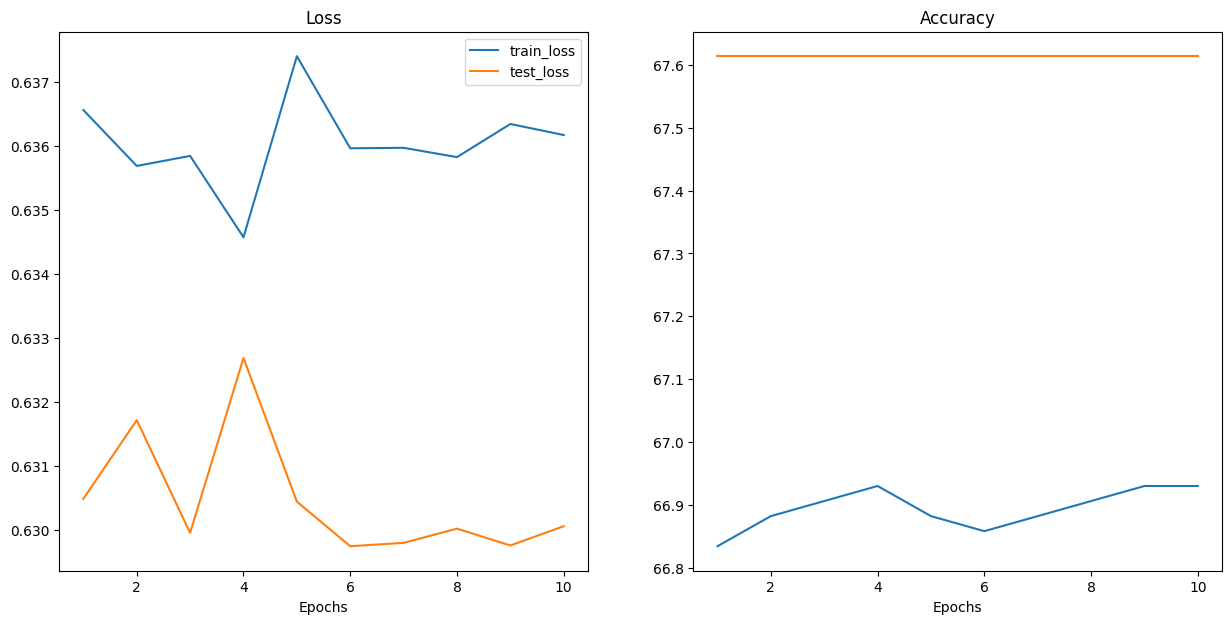

In [182]:
# Plot the curve for Task A 
loss = results_for_task_a["train_loss"]
loss = [item.item() for item in loss ]
test_loss = results_for_task_a["test_loss"]
test_loss = [item.item() for item in test_loss ]

accuracy = results_for_task_a["train_acc"]
test_accuracy = results_for_task_a["test_acc"]

epochs = range(1, 11)

plt.figure(figsize=(15, 7))

# loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, test_loss, label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend() 

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="train_accuracy")
plt.plot(epochs, test_accuracy, label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend

In [183]:
# TO create fisher matrix ( Information tell us about how impotant a paramter is )
def compute_fisher_matrix(model, dataloader, loss_fn):
    model.eval()
    fisher_matrix = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
    
    for inputs, labels in dataloader:
        model.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        for n, p in model.named_parameters():
            if p.grad is not None:
                fisher_matrix[n] += p.grad ** 2 / len(dataloader)  # Square to derivative to enhace effects also, normalise the values by dividing
    
    return fisher_matrix


def EWCLoss(model , fisher_matrix , old_param , lambda_ewc):
    reg_loss = 0.0  # init regularisation loss with zero
    for n , p in model.named_parameters():
        if p.requires_grad:
            reg_loss += torch.sum(fisher_matrix[n] *(p - old_param[n]) ** 2)
            
    return reg_loss * lambda_ewc  # lambda_ewc: Handle Plasticity and stability


In [181]:
temp = compute_fisher_matrix(model , train_dataloader_task_a , loss_fn)
old_params = {n: p.clone() for n, p in model.named_parameters() if p.requires_grad}
lw = EWCLoss(model , temp , old_params
             , lambda_ewc= 1000.0)
# # count = 0
# # for n , p in model.named_parameters():
# #     if p.requires_grad:
# #         print(n)
# #         print(p.shape)
# #         count += 1
# #     # break
# # print(count)
# # fisher_matrix = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
# lw

In [184]:
# setup train and test datafolder for Task B
train_dir_task_b = "Dataset/data/Task B/train"
test_dir_task_b = "Dataset/data/Task B/test"

# Create dataset
train_data_task_b = datasets.ImageFolder(root= train_dir_task_b,
                                         transform= data_transform,
                                         target_transform= None)

test_data_task_b = datasets.ImageFolder(root=test_dir_task_b ,
                                        transform= data_transform,
                                        target_transform= None)


In [185]:
train_data_task_b , test_data_task_a

(Dataset ImageFolder
     Number of datapoints: 1962
     Root location: Dataset/data/Task B/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 346
     Root location: Dataset/data/Task A/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [186]:
# making dataloders 
train_dataloader_task_b = DataLoader(dataset=train_data_task_b,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_task_b = DataLoader(dataset=test_data_task_b,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader_task_b, train_dataloader_task_b

(<torch.utils.data.dataloader.DataLoader at 0x1f9426ec980>,
 <torch.utils.data.dataloader.DataLoader at 0x1f9426ec980>)

In [187]:
len(train_dataloader_task_b) , len(train_data_task_b)/8

(246, 245.25)

In [188]:
import torch.optim.optimizer
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr = lr ,weight_decay= 1e-7 )

In [ ]:
old_params = {n: p.clone() for n, p in model.named_parameters() if p.requires_grad}
fisher_matrix = compute_fisher_matrix(model, train_data_task_a, loss_fn)

In [191]:
# Train the model for task B
results_for_task_b = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

for epoch in tqdm(range(epochs)):
    train_acc, train_loss,  = training_step(model=model,
                                       train_dataloder=train_dataloader_task_b,
                                       loss_function=loss_fn,
                                       opt=optimizer,
                                       accuarcy_cal= accuarcy_cal,
                                       fisher_matrix= fisher_matrix,
                                       old_params= old_params,
                                       device=device)
    
    test_acc,test_loss = testing_step(model=model,
                                    test_dataloder=test_dataloader_task_b,
                                    loss_function=loss_fn,
                                    accuarcy_cal= accuarcy_cal,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results_for_task_b["train_loss"].append(train_loss)
    results_for_task_b["train_acc"].append(train_acc)
    results_for_task_b["test_loss"].append(test_loss)
    results_for_task_b["test_acc"].append(test_acc)

 10%|█         | 1/10 [00:18<02:44, 18.27s/it]

Epoch: 0 | Train loss: 0.6920 | Train acc: 53.0996 | Test loss: 0.6902 | Test acc: 53.8306


 20%|██        | 2/10 [00:30<01:55, 14.48s/it]

Epoch: 1 | Train loss: 0.6906 | Train acc: 52.9980 | Test loss: 0.6907 | Test acc: 53.8306


 30%|███       | 3/10 [00:42<01:34, 13.47s/it]

Epoch: 2 | Train loss: 0.6924 | Train acc: 53.2520 | Test loss: 0.6902 | Test acc: 53.8306


 40%|████      | 4/10 [00:52<01:13, 12.27s/it]

Epoch: 3 | Train loss: 0.6921 | Train acc: 53.2520 | Test loss: 0.6908 | Test acc: 53.8306


 50%|█████     | 5/10 [01:04<00:59, 11.91s/it]

Epoch: 4 | Train loss: 0.6918 | Train acc: 52.1341 | Test loss: 0.6912 | Test acc: 53.8306


 60%|██████    | 6/10 [01:15<00:47, 11.84s/it]

Epoch: 5 | Train loss: 0.6921 | Train acc: 53.0996 | Test loss: 0.6904 | Test acc: 53.8306


 70%|███████   | 7/10 [01:27<00:35, 11.86s/it]

Epoch: 6 | Train loss: 0.6918 | Train acc: 52.4390 | Test loss: 0.6909 | Test acc: 53.8306


 80%|████████  | 8/10 [01:38<00:23, 11.66s/it]

Epoch: 7 | Train loss: 0.6923 | Train acc: 53.2520 | Test loss: 0.6907 | Test acc: 53.8306


 90%|█████████ | 9/10 [01:50<00:11, 11.62s/it]

Epoch: 8 | Train loss: 0.6917 | Train acc: 52.8963 | Test loss: 0.6904 | Test acc: 53.8306


100%|██████████| 10/10 [02:01<00:00, 12.19s/it]

Epoch: 9 | Train loss: 0.6918 | Train acc: 52.7947 | Test loss: 0.6903 | Test acc: 53.8306


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

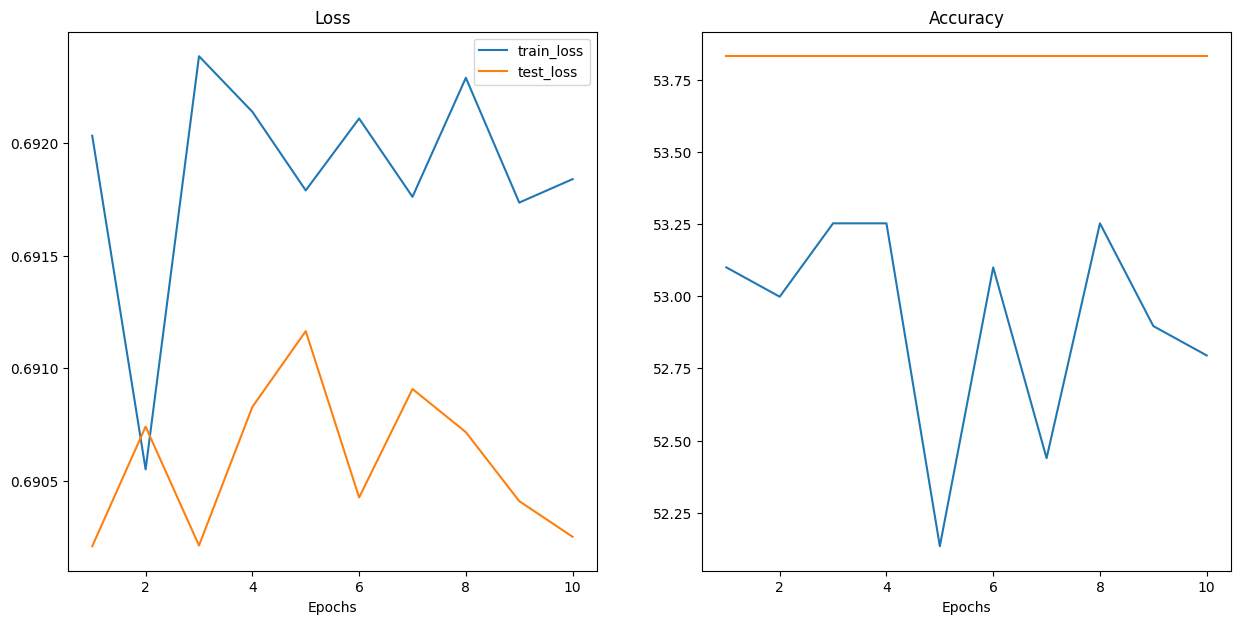

In [192]:
# Plot the curve for Task B
loss = results_for_task_b["train_loss"]
loss = [item.item() for item in loss ]
test_loss = results_for_task_b["test_loss"]
test_loss = [item.item() for item in test_loss ]

accuracy = results_for_task_b["train_acc"]
test_accuracy = results_for_task_b["test_acc"]

epochs = range(1, 11)

plt.figure(figsize=(15, 7))

# loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, test_loss, label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend() 

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="train_accuracy")
plt.plot(epochs, test_accuracy, label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend

In [193]:
# Test the model for task A
epochs = 10
results_for_task_a_new = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

for epoch in tqdm(range(epochs)):
    test_acc,test_loss = testing_step(model=model,
                                    test_dataloder=test_dataloader_task_a,
                                    loss_function=loss_fn,
                                    accuarcy_cal= accuarcy_cal,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results_for_task_a_new["test_loss"].append(test_loss)
    results_for_task_a_new["test_acc"].append(test_acc)

 10%|█         | 1/10 [00:00<00:07,  1.23it/s]

Epoch: 0 | Test loss: 0.6666 | Test acc: 67.6136


 20%|██        | 2/10 [00:01<00:06,  1.18it/s]

Epoch: 1 | Test loss: 0.6666 | Test acc: 67.6136


 30%|███       | 3/10 [00:02<00:05,  1.20it/s]

Epoch: 2 | Test loss: 0.6666 | Test acc: 67.6136


 40%|████      | 4/10 [00:03<00:04,  1.21it/s]

Epoch: 3 | Test loss: 0.6666 | Test acc: 67.6136


 50%|█████     | 5/10 [00:04<00:04,  1.23it/s]

Epoch: 4 | Test loss: 0.6666 | Test acc: 67.6136


 60%|██████    | 6/10 [00:04<00:03,  1.24it/s]

Epoch: 5 | Test loss: 0.6666 | Test acc: 67.6136


 70%|███████   | 7/10 [00:05<00:02,  1.23it/s]

Epoch: 6 | Test loss: 0.6666 | Test acc: 67.6136


 80%|████████  | 8/10 [00:06<00:01,  1.25it/s]

Epoch: 7 | Test loss: 0.6666 | Test acc: 67.6136


 90%|█████████ | 9/10 [00:07<00:00,  1.25it/s]

Epoch: 8 | Test loss: 0.6666 | Test acc: 67.6136


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

Epoch: 9 | Test loss: 0.6666 | Test acc: 67.6136


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

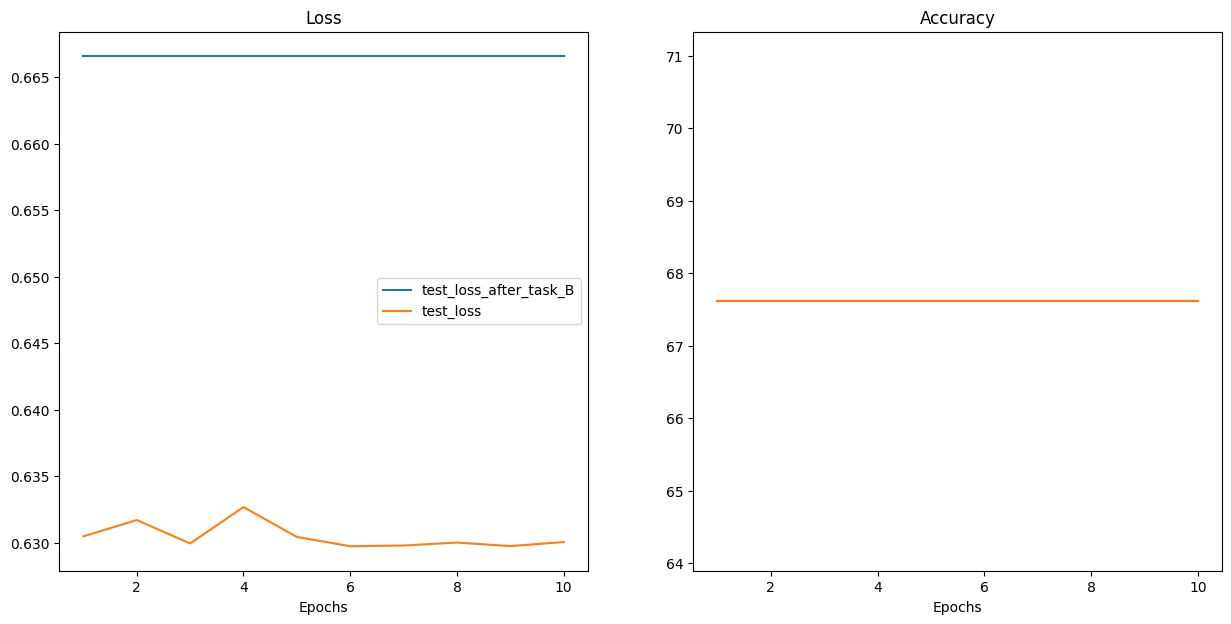

In [194]:
# Plot the curve for Task A 
test_loss = results_for_task_a["test_loss"]
test_loss = [item.item() for item in test_loss ]
test_loss_new = results_for_task_a_new["test_loss"]
# test_loss_new = [item.item() for item in test_loss ]

test_accuracy = results_for_task_a["test_acc"]
test_accuracy_new = results_for_task_a_new["test_acc"]

epochs = range(1, 11)

plt.figure(figsize=(15, 7))

# loss
plt.subplot(1, 2, 1)
plt.plot(epochs, test_loss_new, label="test_loss_after_task_B")
plt.plot(epochs, test_loss, label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend() 

# accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracy_new, label="train_accuracy_after_task_B")
plt.plot(epochs, test_accuracy, label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend

In [164]:
test_accuracy_new = results_for_task_a_new["test_acc"]

In [165]:
test_accuracy_new

[67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636,
 67.61363636363636]

In [200]:
import torchvision
from torchvision.models import resnet50
model = torchvision.models.resnet50(pretrained = True)

c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [204]:
# temp = compute_fisher_matrix(model , train_data_task_a , loss_fn)
summary(model , input_size=(8 , 3, 64 , 64))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [8, 1000]                 --
├─Conv2d: 1-1                            [8, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [8, 64, 32, 32]           128
├─ReLU: 1-3                              [8, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [8, 64, 16, 16]           --
├─Sequential: 1-5                        [8, 256, 16, 16]          --
│    └─Bottleneck: 2-1                   [8, 256, 16, 16]          --
│    │    └─Conv2d: 3-1                  [8, 64, 16, 16]           4,096
│    │    └─BatchNorm2d: 3-2             [8, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [8, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [8, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [8, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [8, 64, 16, 16]           --
│ 